# Route Maps by Parade

This notebook will attempt to make sensable route maps by parade

In [1]:
#imports and such
from datetime import datetime
import geopandas as gpd
import geoplot as gplt
import os
from matplotlib import pyplot as plt
import shapely

In [2]:
def lp(v):
    print(f"[{datetime.now()}] {v}")

lp("Starting...")

[2025-02-25 15:03:28.146448] Starting...


In [3]:
mapsPath = f"{os.curdir}{os.sep}RouteMaps{os.sep}"
lp(f"Maps Path:  {mapsPath}")

if not os.path.exists(mapsPath):
    lp(f"Creating  {mapsPath}")
    os.mkdir(mapsPath)

[2025-02-25 15:03:28.152182] Maps Path:  ./RouteMaps/


In [4]:
dataPath = f"{os.curdir}{os.sep}datasets{os.sep}"
lp(f"Data Path:  {dataPath}")

[2025-02-25 15:03:28.156087] Data Path:  ./datasets/


In [5]:
#all the parade routes
routesDf = gpd.read_file(f"{dataPath}paradeRoutes.geojson").to_crs('WGS84')
#routesDf['geometry'] = routesDf['geometry'].map(lambda x: x.geoms[0])
routesDf.set_index('parade', inplace=True)
routesDf.head()

,location,numfloats,formation,disband,objectid,date,time,shape_stlength,day,geometry
parade,,,,,,,,,,
Chaos,Uptown,None,Napoleon and Magazine,Canal and Roosevelt Way,17,2025-02-27 18:30:00+00:00,6:30pm,18801.130441472782,2nd Thursday,"MULTILINESTRING ((-90.10137 29.92082, -90.1018..."
Cleopatra,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,4,2025-02-21 18:00:00+00:00,6:00pm,21161.075592614441,1st Friday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ..."
Krewe Du Vieux,Downtown,None,Marigny and Decatur,Andrew Higgins and S. Peters,34,2025-02-15 18:30:00+00:00,6:30pm,15476.953108061272,Walking Parade,"MULTILINESTRING ((-90.05506 29.96271, -90.0551..."
Tucks,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,22,2025-03-01 12:30:00+00:00,12:30pm,21095.835274003577,2nd Saturday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ..."
Bohème,Downtown,None,Decatur St. from Mandeville St to Music St.,Basin St and Canal St.,36,2025-02-14 19:00:00+00:00,7:00pm,12290.192829423802,Walking Parade,"MULTILINESTRING ((-90.05392 29.96277, -90.0550..."


In [6]:
#convert multilines to singlelines
#routesDf['geometry'] = routesDf['geometry'].map(lambda x: x.geoms[0])

In [7]:
#all of our streets
streetsDf = gpd.read_file(f"{dataPath}streets.geojson")
streetsDf.head()

,munileft,mtfcc,strtetype,maintby,centerlineid,stateright,fromleft,joinid,roadlevel,lasteditor,...,ctyroute,astrtetype,msagleft,fedrtetype,afedrte,inwater,toleft,shape_stlength,fullnameabv,geometry
0,New Orleans,None,None,None,2501358,LA,6200,460,None,CMARD,...,None,None,None,None,None,None,6298,374.69106670567925,Constance St,"MULTILINESTRING ((-90.12482 29.92233, -90.1249..."
1,New Orleans,None,None,None,2507761,LA,2600,873,None,CMARD,...,None,None,None,None,None,None,2698,351.09598315083429,Hamilton St,"MULTILINESTRING ((-90.1272 29.96419, -90.12711..."
2,New Orleans,None,None,None,2510743,LA,0,671,None,CMARD,...,None,None,None,None,None,None,0,50.711363770514147,Encampment St,"MULTILINESTRING ((-90.08325 29.99944, -90.0832..."
3,New Orleans,None,None,None,2515776,LA,5461,1732,None,DBALBERT,...,None,None,None,None,None,None,5499,165.29887948728282,N Rampart St,"MULTILINESTRING ((-90.01771 29.96031, -90.0172..."
4,New Orleans,None,None,None,2522988,LA,10701,1704,None,CMARD,...,None,None,None,None,None,None,10731,252.75257190809734,Prentiss Ave,"MULTILINESTRING ((-89.96195 30.0232, -89.96185..."


In [8]:
#this created plenty of warning but we are just loading it so we can see the mississppi and maybe some other water if it comes to that
riverDf = gpd.read_file(f"{dataPath}MississippiRiver.zip")
riverDf.head()

/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 3 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 4 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 5

,WATER2_ID,FEATURE,LENGTH,XXX,geometry
0,1,0,0.0,Region,"MULTIPOLYGON (((-90.54858 30.16849, -90.54896 ..."
1,2,0,0.0,Region,"MULTIPOLYGON (((-90.02944 29.96027, -90.02743 ..."
2,3,0,0.0,Region,"MULTIPOLYGON (((-90.3685 30.05726, -90.36874 3..."
3,4,0,0.0,None,"MULTIPOLYGON (((-89.4196 30.03959, -89.41818 3..."
4,5,0,0.0,None,"MULTIPOLYGON (((-89.37342 30.0375, -89.31526 3..."


In [9]:
sorted(routesDf.index)

['Alla',
 'Babylon',
 'Bacchus',
 'Barkus',
 'Bohème',
 'Carrollton',
 'Chaos',
 'Chewbacchus',
 'Choctaw',
 'Cleopatra',
 'Crescent City',
 "D'etat",
 'Druids',
 'Elks',
 'Endymion',
 'Femme Fatale',
 'Freret',
 'Hermes',
 'Iris',
 'King Arthur',
 'Krewe Du Vieux',
 'Mars',
 'Mid-City',
 'Morpheus',
 'Muses',
 'NOMTOC',
 'Okeanos',
 'Orpheus',
 'Oshun',
 'Pontchartrain',
 'Proteus',
 'Pygmalion',
 'Rex',
 'Sparta',
 'Thoth',
 'Tucks',
 'Zulu']

In [10]:
class MyTransform:
    
    
    def __init__(self,extent):
        self.extent = extent

    def transform2XY(self,lon,lat):
        lonTrans = self.extent[0] - self.extent[2]
        latTrans = self.extent[1] - self.extent[3]
    
        x = abs((lon - self.extent[0]) / lonTrans)
        y = abs((lat - self.extent[1]) / latTrans)
    
        return (x,y)

    def figSize(self, figWidth=10):

        lonLen = self.extent[2] - self.extent[0]
        latLen = self.extent[3] - self.extent[1]

        figHeight = figWidth * (latLen / lonLen)
        
        return (figWidth, figHeight)

    def extentWithBuffer(self,setExtent = True, buffer = 0.001):

        newExtent = shapely.geometry.box(*self.extent).buffer(buffer).bounds

        if setExtent:
            self.extent = newExtent
        
        return newExtent

    
        
        

[2025-02-25 15:03:30.497992] Creating Map for Chewbacchus		Fig Size: (10, 10.123919379498265)	Extent:  (-90.065688549738, 29.953192035750998, -90.04914601742199, 29.969939562101)	CRS:  <geoplot.crs.Mercator object at 0x7ff7797c83d0>
[2025-02-25 15:03:31.486380] Finished Chewbacchus in 0:00:00.990276


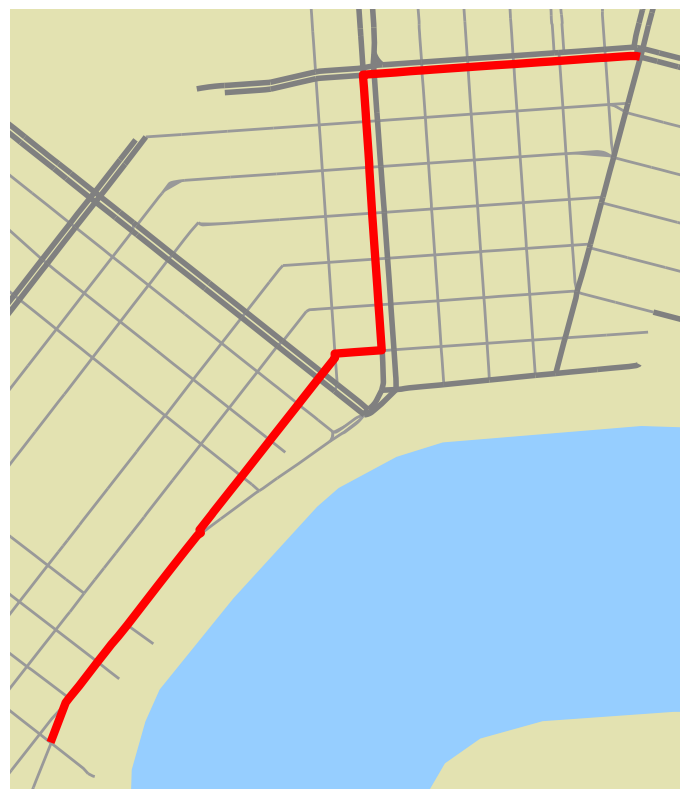

In [11]:
streetClasses = ['Local', 'Major Arterial', 'Other', 'Umimproved', 'Ramp','Freeway', 'Minor Arterial', None]



def plotParade(name="Chewbacchus", figWidth = 10, savePlot=False):

    startTime = datetime.now()

    crs = gplt.crs.Mercator()

    
    myTransform = MyTransform(routesDf.loc[[name],'geometry'].total_bounds)

    extent = myTransform.extentWithBuffer()

    
    
    figSize =  myTransform.figSize(figWidth)

    lp(f"Creating Map for {name}\t\tFig Size: {figSize}\tExtent:  {extent}\tCRS:  {crs}")

    
    fig, ax = plt.subplots(figsize=figSize, subplot_kw={'projection': crs})

    streetNameMask = streetsDf.intersects(routesDf.loc[name,'geometry'])

    usefulStreetsList = streetsDf[streetNameMask]['fullnameabv'].unique()

    streetMask = streetsDf['fullnameabv'].isin(usefulStreetsList)

    streetTypeMask = {}
    for st in streetClasses:
        streetTypeMask[st] = streetMask & ( streetsDf['roadclass'] == st )


    ax.set_facecolor((0.89, 0.886, 0.694))
    gplt.polyplot(riverDf, ax=ax, extent=extent, color=(0.588,0.808,1.0), zorder=-2)

    #plot street types
    gplt.polyplot(streetsDf[streetTypeMask['Freeway']], ax=ax, extent=extent, color=(0.4,0.4,0.4), linewidth=5, zorder=-1)
    
    gplt.polyplot(streetsDf[streetTypeMask['Local']], ax=ax, extent=extent, color=(0.6,0.6,0.6), linewidth=2, zorder=3)
    gplt.polyplot(streetsDf[streetTypeMask['Minor Arterial']], ax=ax, extent=extent, color=(0.55,0.55,0.55), linewidth=3, zorder=4)
    gplt.polyplot(streetsDf[streetTypeMask['Major Arterial']], ax=ax, extent=extent, color=(0.5,0.5,0.5), linewidth=4, zorder=5)

    
    
    gplt.polyplot(routesDf.loc[[name],'geometry'], ax=ax, extent=extent, edgecolor='red',linewidth=6, zorder=10)
   
    
    if savePlot:
        fig.savefig(f"{mapsPath}{name}.svg")
        plt.close()

    lp(f"Finished {name} in {datetime.now()-startTime}")

plotParade()

In [12]:
startTime = datetime.now()
lp("Creating all maps and saving...")
for p in sorted(routesDf.index):

    lp(f"calling:  plotParade({p}, savePlot=True)")
    plotParade(p, savePlot=True)

lp(f"Total time {datetime.now() - startTime}")

[2025-02-25 15:03:38.514243] Creating all maps and saving...
[2025-02-25 15:03:38.514372] calling:  plotParade(Alla, savePlot=True)
[2025-02-25 15:03:38.515327] Creating Map for Alla		Fig Size: (10, 6.849103004903176)	Extent:  (-90.11598188915501, 29.919291714901, -90.06515484430099, 29.954103681465)	CRS:  <geoplot.crs.Mercator object at 0x7ff794cd79d0>
[2025-02-25 15:03:47.327067] Finished Alla in 0:00:08.812670
[2025-02-25 15:03:47.327166] calling:  plotParade(Babylon, savePlot=True)
[2025-02-25 15:03:47.328483] Creating Map for Babylon		Fig Size: (10, 9.310473147192152)	Extent:  (-90.102936988066, 29.919819795492, -90.06611406249499, 29.954103681465)	CRS:  <geoplot.crs.Mercator object at 0x7ff778477310>
[2025-02-25 15:03:53.143410] Finished Babylon in 0:00:05.816222
[2025-02-25 15:03:53.143512] calling:  plotParade(Bacchus, savePlot=True)
[2025-02-25 15:03:53.144514] Creating Map for Bacchus		Fig Size: (10, 9.016019948240151)	Extent:  (-90.102936988066, 29.916155278351, -90.06084701

In [13]:
lp("FIN")

[2025-02-25 15:08:04.145306] FIN
